# Traffic and Throughput

In this notebook, we will plot out the distribution of packet uploads over the course of an hour as generated by sensors and mules in `schedule_generation.ipynb`. Hopefully we see nice little spikes or something, because that would be expected.

In [6]:
# Import libraries.
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

def display_upload_traffic(t_grain = 50, # size of each bin
                           schedule_file='prob_data/random_uploads/schedule.csv',
                           title='upload traffic'
                          ):
    # Read in schedule data.
    schedule_df = pd.read_csv(schedule_file, skiprows=3)
    
    # Plot histogram to show uploads over time
    last_upload_time = schedule_df['batch_time'].max()
    num_bins = math.ceil(last_upload_time / t_grain)
    t_edges = [t * t_grain for t in range(num_bins+1)]

    plt.figure(figsize=(15,10))
    plt.hist(schedule_df['pickup_time'], bins=t_edges, label='naive')
    plt.hist(schedule_df['batch_time'], bins=t_edges, label='batched', alpha=0.8)
    plt.title(title)
    plt.xlabel('time in seconds')
    plt.ylabel('packets uploaded')
    plt.legend()
    plt.show()

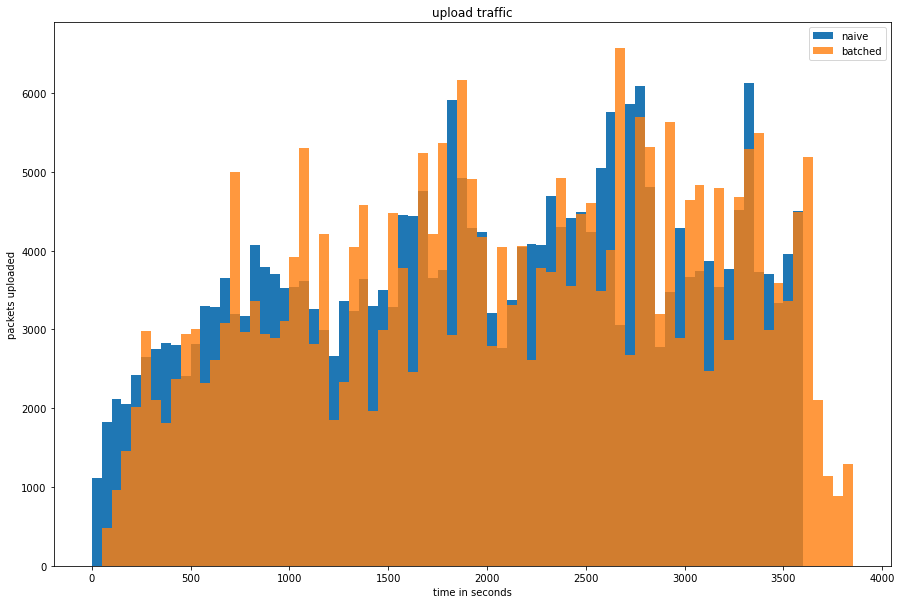

In [7]:
display_upload_traffic()

Interactions and uploads look good! All of the uploads finish after an hour, which is when the simulation ends, but when we try to batch and cap the size of each upload, the mules are so overloaded that they continue offloading batches after the simulation ends, which is about what we would expect.

## Plot upload traffic for different number of mules

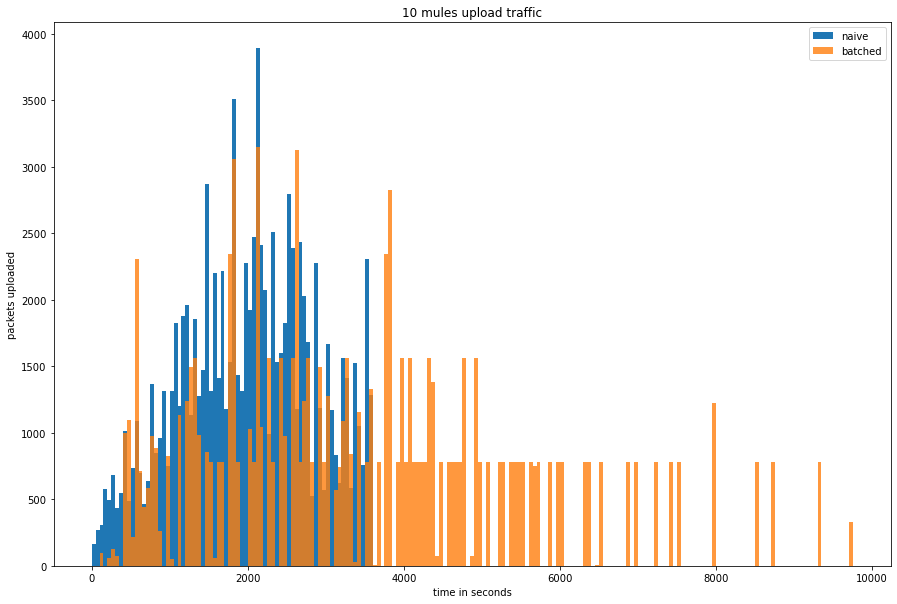

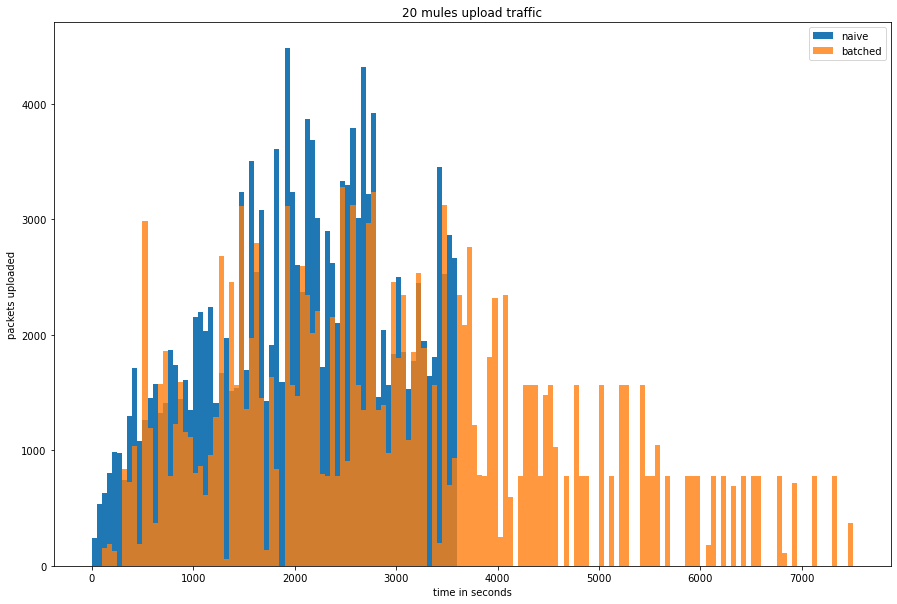

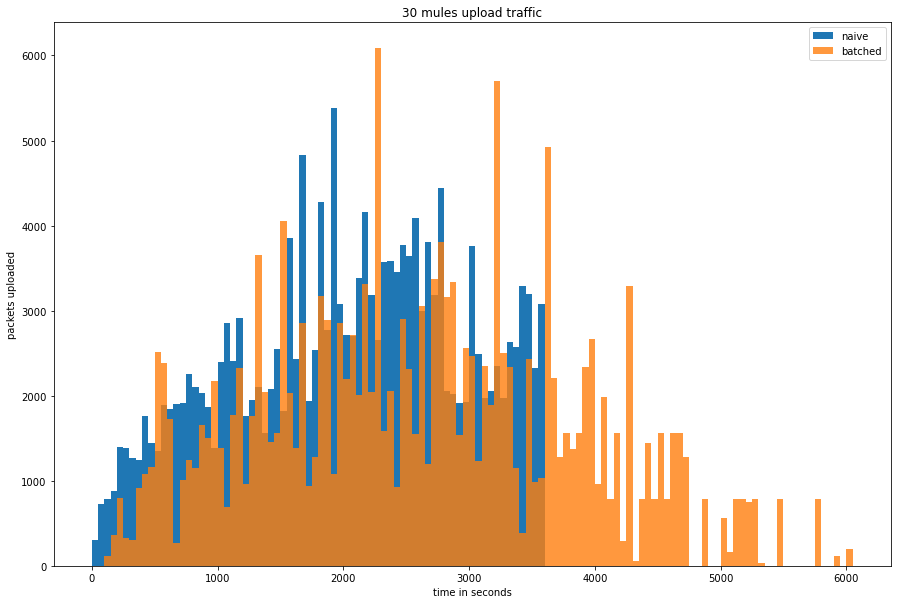

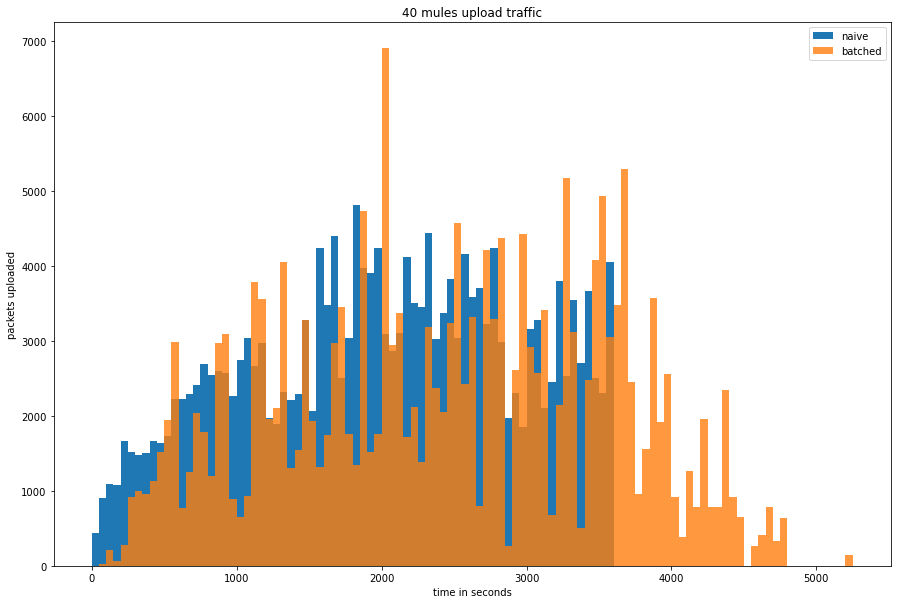

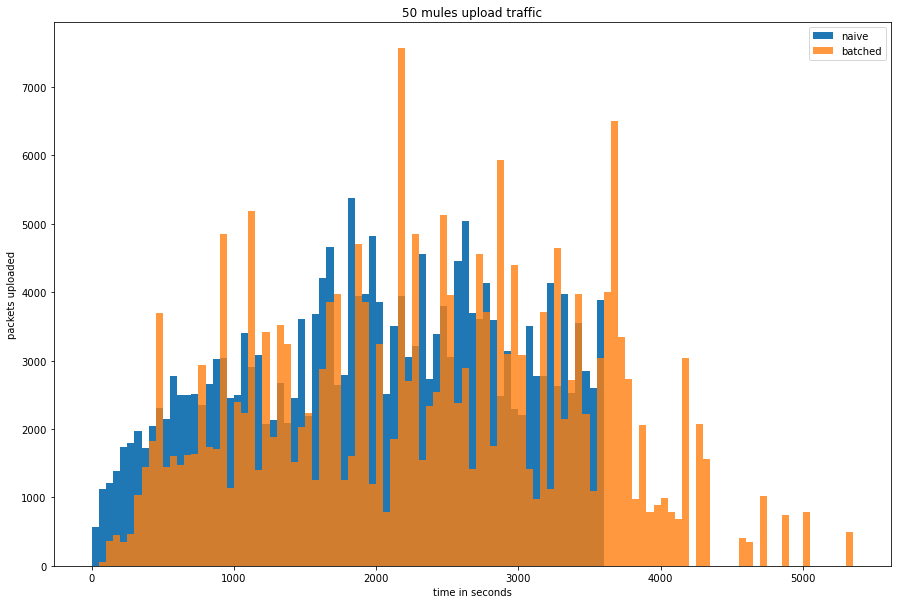

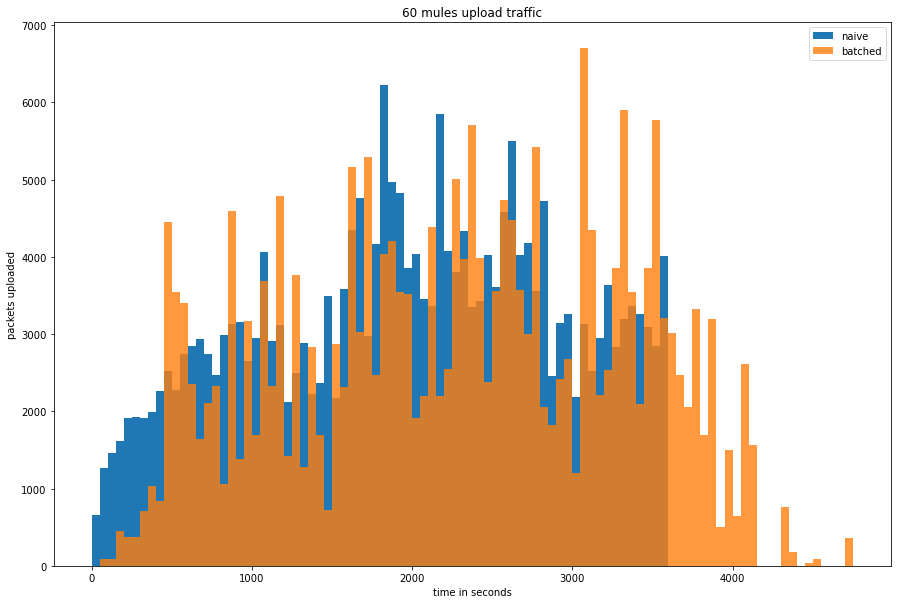

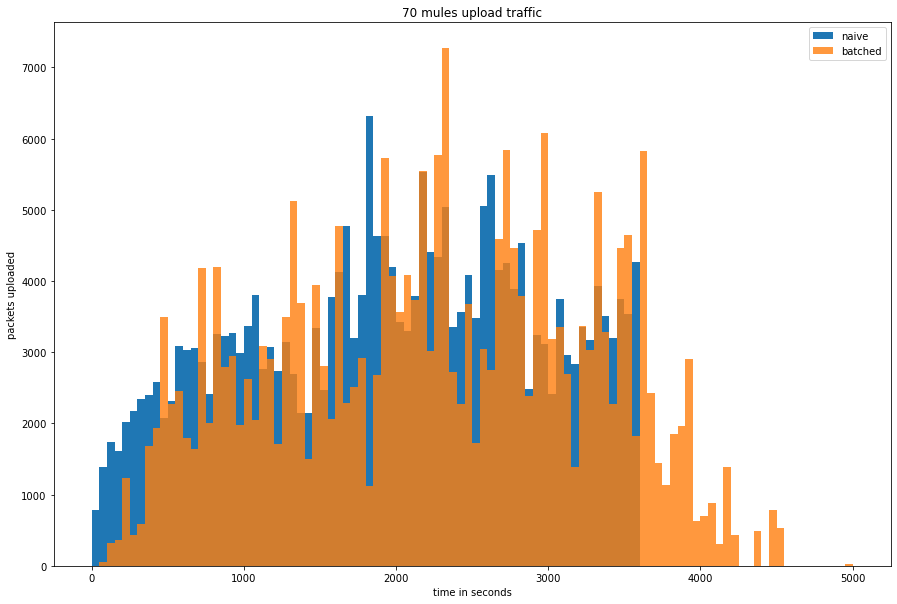

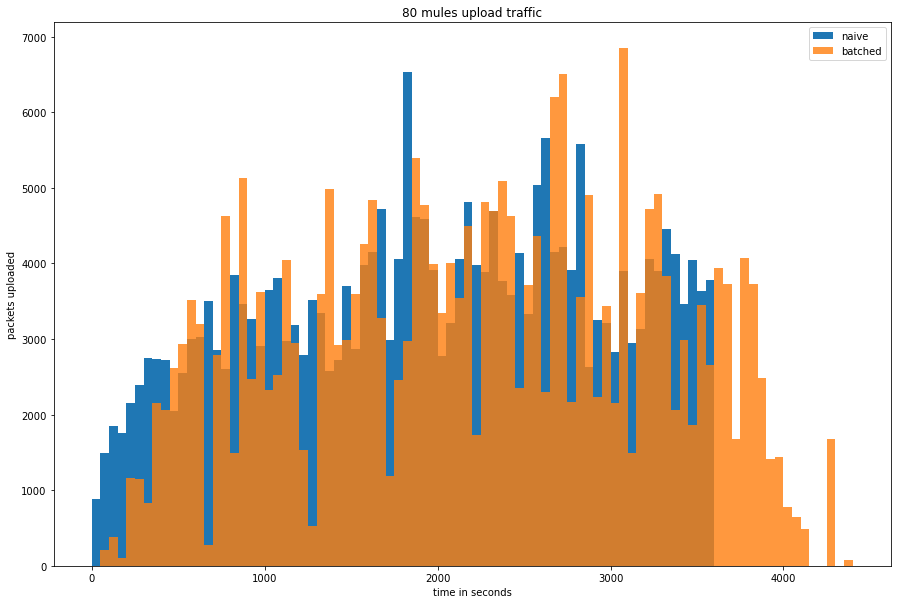

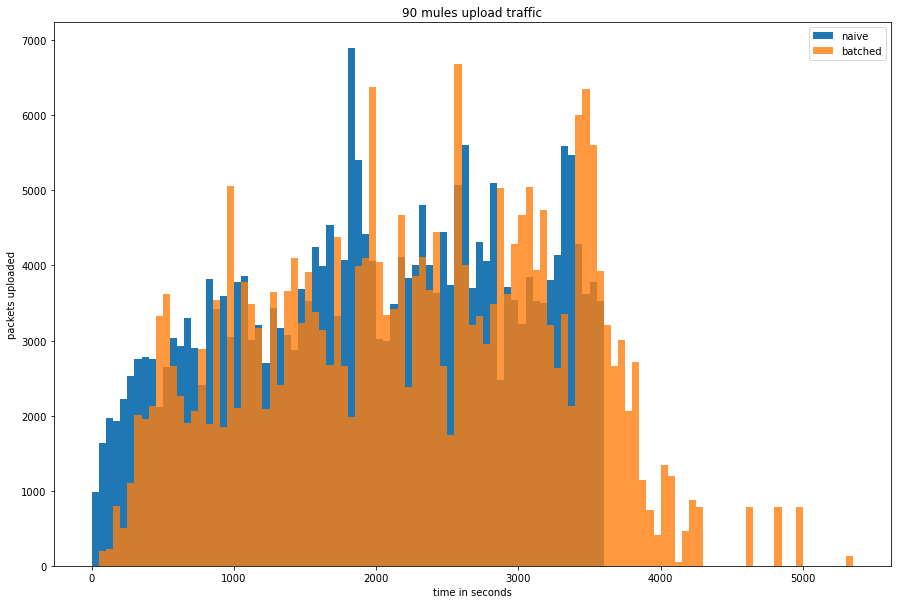

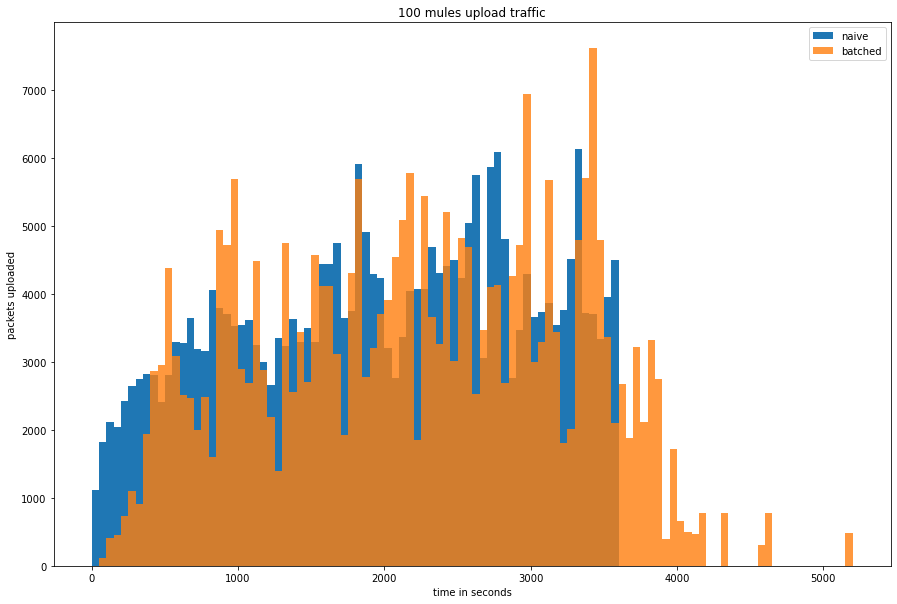

In [9]:
# Set parameters.
num_mules_list = [10, 20, 30, 40, 50, 60, 70 ,80, 90, 100] # integer <= 100
schedule_file = 'prob_data/random_uploads/vary_mules/{}_mule_schedule.csv'
title = '{} mules upload traffic'

for num_mules in num_mules_list:
    display_upload_traffic(schedule_file=schedule_file.format(num_mules), title=title.format(num_mules))
